# GMML 2021. Computing Intrinsic Distances on Data Manifolds with Discrete Parallel Transport

## Aleksandr Nevarko, Konstantin Soshin

### May, 2021, Skoltech
#### https://github.com/SoshinK/Parallel-Transport-Unfolding

## Manifold model

The data lie on or near an unknown Data manifold $M$ of unknownlower dimension $q < p$ embedded in an ambient high-dimensional input space $R^p$.

## Dimensionality Reduction as Sample Embedding problem

Givent an input dataset $X_n=\{X_1,X_2,...,X_n\}\subset R^p$ find an "$n$-point" Embedding mapping

$$h_{(n)}:X_n \rightarrow Y_n(X_N)=\{y_1,y_2,...,y_n\}\subset R^q$$

$q$-dimensional datset $Y_n$ ($q<p$) **faithfully represents** sample $X_n$.



## Isomap

* Compose proximity graph on dataset $X$
* Approximate geodesic distances between points using Dijkstra algorithm
* Multidimensional scaling

## Isomap

* Robust to noise

But

* Works  good  onlyon regularly sampled data
* Fails ondata with topological holes and irregularities


## Parallel Transport Unfolding 

* Construct a proximity graph $G$ of the pointset $X$ and compute local tangent spaces at each point
* Approximate all pairwise geodesic distances using parallel transport along (shortest) paths on $G$
* Perform MDS to find a $d$-dimensional embedding that best preserves all the geodesic distances

Exploiting parallel transport in high dimension helps better evaluate
geodesic distances.

### Parallel Transport in Differential Geometry

Prescribing how a basis of the tangent space at one point of a manifold should be adjusted to produce a “parallel” basis of another
tangent space at a nearby point

## Parallel Transport Unfolding

### Step 1

Construct a proximity graph $G$ of the pointset $X$ and compute local tangent spaces at each point

$K$ nearest neighbors: $N(i)=\{X_{1(i)},X_{2(i)},...,X_{K(i)}\}$

$d$ left singular vectors:

$$T_i=\big( t_1^i,...,t_d^i \big) \subset \mathbb{R}^{D\times d}$$

 


## Parallel Transport Unfolding

### Discrete metric connection

Orthogonal $d\times d$ matrix $R_{j,i}$ represents the change of basis.

$$R_{j,i}=argmin_{R\in O(d)} \| T_i-T_jR \|_F^2$$

#### Proposition

Let $T_i^TT_j=U\Sigma V^T$ - SVD. Then:

$$R_{j,i}=VU^T$$


## Parallel Transport Unfolding

### Step 2. Local path unfolding

Unfold polyline $(x_i, x_j, x_k)\subset M$

Let $y_i \equiv x_i$

$e_i=x_j-x_i$

$e_j=x_k-x_j$

$v_i=T_i^Te_i$

$v_j=R_{i,j} \big[ T_j^T e_j \big]$

$y_i \equiv x_i$

$y_j = y_i+v_i$


$y_k=y_j + v_j = y_i+v_i+ v_j$

## Parallel Transport Unfolding

### Step 3. MDS

Given $\|D\|_{ij}$

$$Y=argmin_Y \sum\limits_{i,j=1}^n \big(D_{ij} - \|y_i - y_j\|^2) \big)^2$$

## Diffusion Maps

Let $ ( X, \mathcal{A}, \mu )$ be a measure space, where:

* $X$ is the data
* $\mu$ is point distribution

Also assume that we are given a metric kernel $k : X \times X \rightarrow \mathbb{R}$, that sattisfies:

* $k$ is symmetric: $k(x, y) = k(y, x)$
* $k$ is positivity preserving: $k(x, y) \ge 0$

## Diffusion maps

Set a local volume measure or a degree in a graph as:
$$d(x) = \int_{X} k(x, y) d\mu(y) $$
Next we define a new kernel:
$$p(x, y) = \frac{k(x, y)}{d(x)}$$
That kernel can be viewed as a transition kernel of a Markov chain on $X$.

## Diffusion maps

The Markov chain matrix $P$ created by kernel $p(x, y)$ in the power $t: P^t$ can be viewed as the matrix of probabilities of transitioning from one point in dataset to another in $t$ steps.

Spectral analysis of this matrix $P$ aloows us to create a dataset embedding with new axes as it's eigenvectors with the property, that pairwise distances between points are preserved up to a certain relative accuracy $\delta$ with respect to a given distance metric.

<img src="imgs/diff_map_8.png" width=700> </img>

## Experiments

In [1]:
import matplotlib.pyplot as plt
from experiments_linear import experiment_plane
from experiment_s_roll import experiment_s_roll
from experiments_geodesic import experiment_geodesic
from experiment_faces import experiment_faces

## Linear Precision

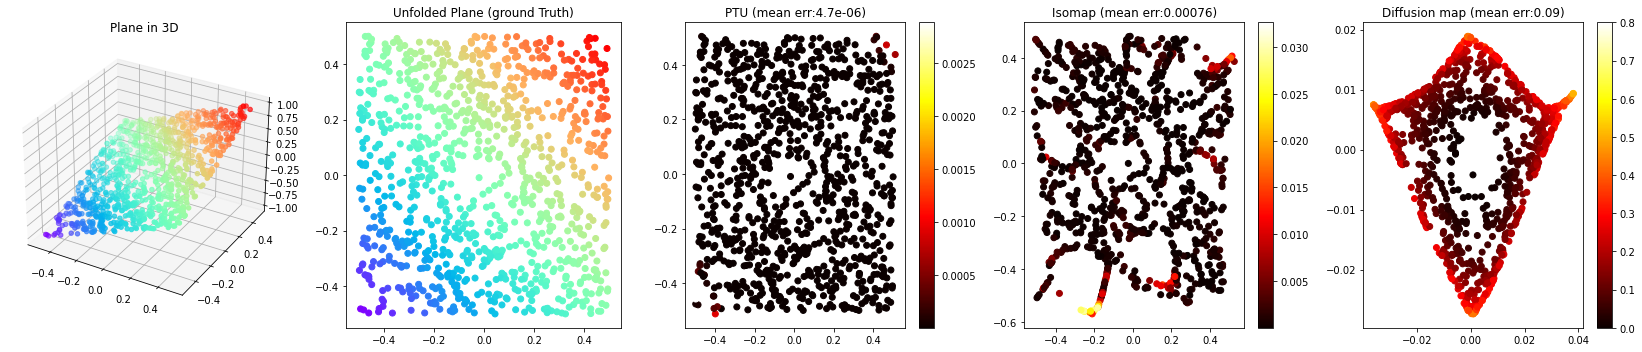

In [2]:
experiment_plane(1000, 123, 2, n_neighbors=10)

## Non-Geodesically-Convex Domains.

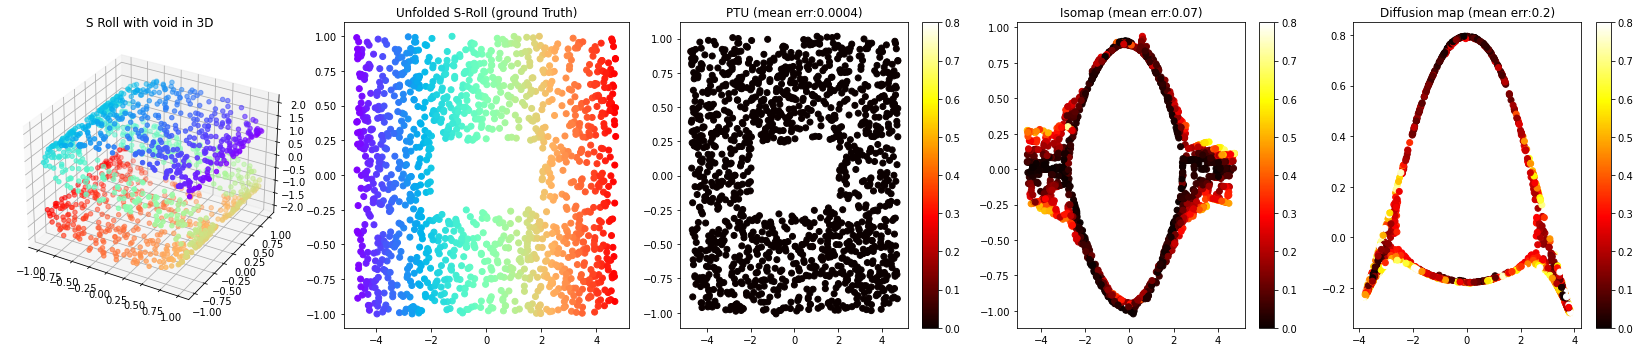

In [3]:
experiment_s_roll(1500, 123, 2, n_neighbors=10)

## Geodesic distance estimation

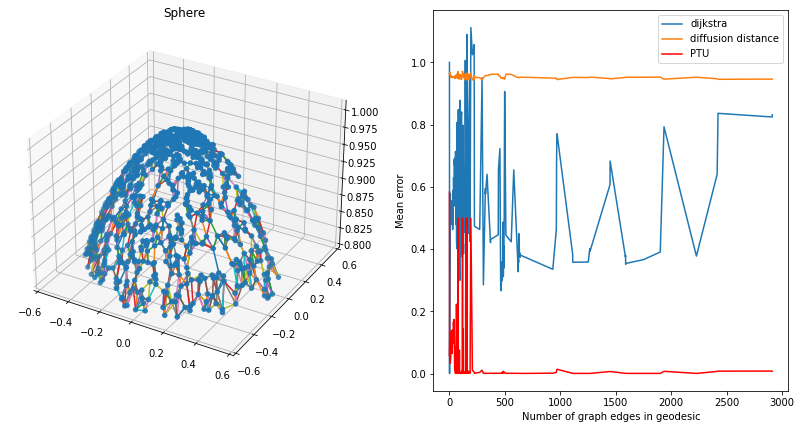

In [4]:
experiment_geodesic()

## High-dimensional dataset

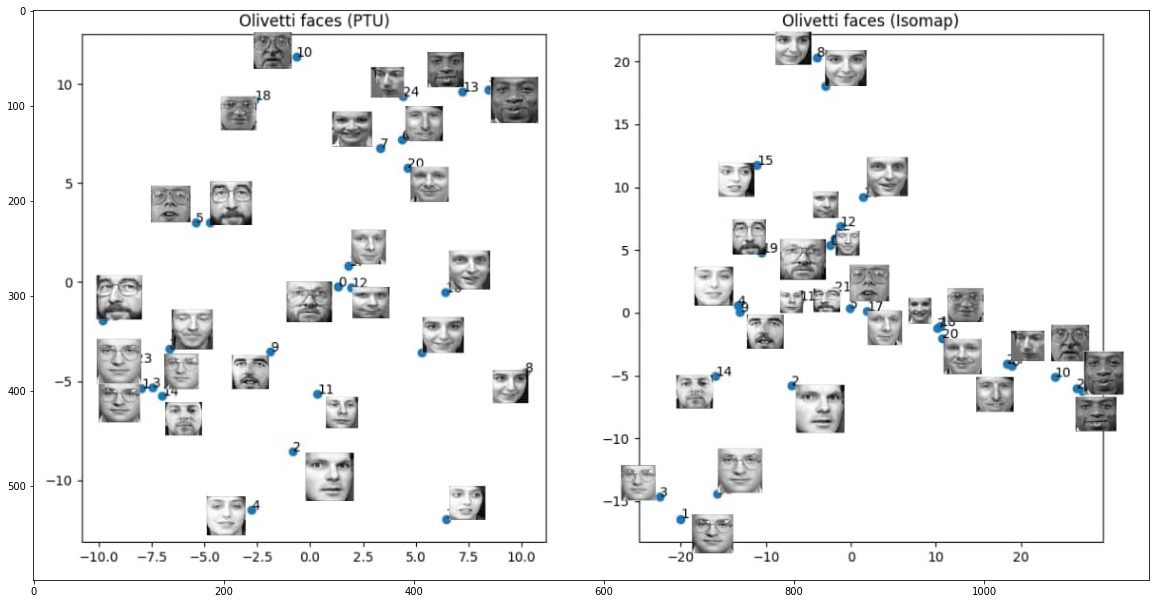

In [6]:
plt.figure(figsize=(20, 20))
plt.imshow(plt.imread('faces.jpg'))

# Thank you!